In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predição de Salário - Problema de Regressão
* Este projeto tem por objetivo, efetuar uma predição dos salários para determinados empregos, com base em um conjunto de dados usando o seu texto.

* Este notebook contém a Análise Exploratória dos dados e também adição de novas características aos dataSets.

# Carregando as bibliotecas necessárias.

* A seguir será efetuado o carregamento das bibliotecas necessárias para uso no projeto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# Carregando os dados.

* A seguir é efetuado o carregamento dos dados para uso na análise. Dentro do parenteses o caminho deve ser alterado para o caminho de onde está alocado o .csv do dataSet de treino.

In [2]:
train = pd.read_csv(f'Train_rev1.csv')
#test = pd.read_csv(f'/content/drive/MyDrive/Test_rev1.csv')
#valid = pd.read_csv(f'/content/drive/MyDrive/Valid_rev1.csv')
#location = pd.read_csv(f'/content/drive/MyDrive/Location_Tree.csv',header=None)

# AED (Análise Exploratória de Dados)
* Esta parte do projeto destina-se a análise exploratória de dados, parte importante de um projeto de DataScience. Através dessa primeira análise poderemos ter noções sobre o conjunto de dados que estamos trabalhando e também aplicar limpeza e transformação de dados.
 

### Validando as informações dos dataSets.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


* Observa-se que existem 244768 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.
* Um item faltante em Title.

### Encontrando o item faltante no Cargo.
* Encontrar o indice do item faltante para validar se pode ser adicionado manualmente o cargo.

In [4]:
for indice,conteudo in train.Title.items():
    if type(conteudo) != str :
        print(indice)

1588


In [5]:
train.loc[1588]

Id                                                             48271669
Title                                                               NaN
FullDescription       Quality Improvement Manager North West England...
LocationRaw                                       Liverpool, Merseyside
LocationNormalized                                            Liverpool
ContractType                                                  full_time
ContractTime                                                        NaN
Company                                                             NaN
Category                                      Healthcare & Nursing Jobs
SalaryRaw                                     40,000 to 45,000 per year
SalaryNormalized                                                  42500
SourceName                                               careworx.co.uk
Name: 1588, dtype: object

* Verificado o item de indice 1588, onde o cargo é o 'Quality Improvement Manager'

* Adicionar dados ao indice 1588 

In [6]:
train.loc[[1588],'Title'] = 'Quality Improvement Manager'

* Validar dados adicionados.

In [7]:
train.info(), train.loc[1588]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244768 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


(None,
 Id                                                             48271669
 Title                                       Quality Improvement Manager
 FullDescription       Quality Improvement Manager North West England...
 LocationRaw                                       Liverpool, Merseyside
 LocationNormalized                                            Liverpool
 ContractType                                                  full_time
 ContractTime                                                        NaN
 Company                                                             NaN
 Category                                      Healthcare & Nursing Jobs
 SalaryRaw                                     40,000 to 45,000 per year
 SalaryNormalized                                                  42500
 SourceName                                               careworx.co.uk
 Name: 1588, dtype: object)

* Verifica-se que fora adicionado o dado.

In [8]:
#test.info()

* Observa-se que existem 122463 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

In [9]:
#valid.info()

* Observa-se que existem 40663 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

### Verificando duplicidade de dados nos DataSets.

In [10]:
train.Id.unique().size

244768

* Pode-se verificar que o Id é único em todos os datasets.

### Verificando os dados.
* Usando um histogramas para validar a distribuição dos dados da coluna SalaryNormalized

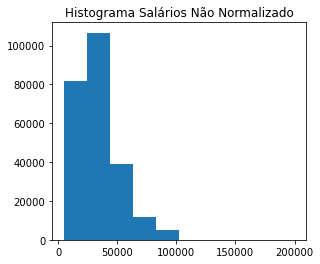

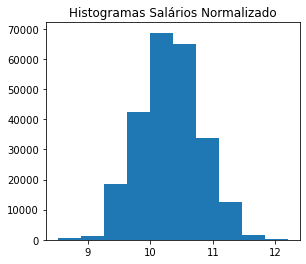

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(train.SalaryNormalized)
plt.title('Histograma Salários Não Normalizado')
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 2) 
plt.hist(np.log(train.SalaryNormalized))
plt.title('Histogramas Salários Normalizado')
plt.show()

# Pré-Processamento de dados.
* Nessa fase iremos preparar os dados para a modelagem, com auxílio de algumas análises.

### Utilizando uma cópia do DataSet.
* Utilizando essa técnica para se caso ocorra um erro apenas recarreguemos o dataset inicial de treino, retornando desse ponto.

In [12]:
df_tmp = train.copy()

### Transformando os dados.
* Transformando os dados de cargos todos em caracteres minúsculos.

In [13]:
df_tmp.groupby('LocationRaw').count().sort_values(by='SalaryNormalized',ascending=True)

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
LocationRaw,,,,,,,,,,,
"London, Middlesex, Hertfordshire, Buckinghamshire, Surrey, , Greater London",1,1,1,1,0,0,1,1,1,1,1
Nass,1,1,1,1,1,0,1,1,1,1,1
"National - Midlands, Home Counties, Thames Valley, South",1,1,1,1,0,1,1,1,1,1,1
National Role - Preferably Midlands/North West,1,1,1,1,1,1,1,1,1,1,1
National Role but Ideally based in the North of England,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
City of London - London,2344,2344,2344,2344,2344,2309,2344,2344,2344,2344,2344
City London South East,2843,2843,2843,2843,15,2667,2843,2843,2843,2843,2843
UK,5538,5538,5538,5538,2758,4685,5086,5538,5538,5538,5538


### Conferindo se a coluna 'SalaryRaw' tem algum valor nulo

In [14]:
df_tmp.SalaryRaw.isna().sum()

0

### Criação de novas características

* Criação de lista para alocar os valores de salários. Onde os valores dos salários serão usados para criação de uma possível feature a faixa salarial.

In [15]:
def listasSalaryRange (x) :
    salary_full_list = x.tolist()
    pattern = '[0-9]{1,3}[,.]?[0-9]*'
    p = re.compile(pattern)
    # Criando uma lista apenas com os números.
    onlyDigitSalary = [p.findall(numero) for numero in salary_full_list]
    # Alocando a faixa salarial nas uma listas.
    LowSalaryRange = [salario[:1] for salario in onlyDigitSalary]
    HighSalaryRange = [salario[1:2] for salario in onlyDigitSalary]
    # Validando o tamanho da lista ela deve conter o tamanho do DataSet no eixo y.
    print(len(LowSalaryRange),len(HighSalaryRange) )
    return LowSalaryRange, HighSalaryRange

In [16]:
low, high = listasSalaryRange(df_tmp.SalaryRaw)

244768 244768


* Verificando o formato da lista de faixa salarial

In [17]:
low[:10],high[:10]

([['20000'],
  ['25000'],
  ['20000'],
  ['25000'],
  ['20000'],
  ['20000'],
  ['50000'],
  ['18000'],
  ['18000'],
  ['70000']],
 [['30000'],
  ['35000'],
  ['40000'],
  ['30000'],
  ['30000'],
  ['30000'],
  ['100000'],
  ['26000'],
  ['28000'],
  ['100000']])

* Ajustando a lista de Faixa Salarial

In [18]:
# Alocando a faixa salarial nas colunas
df_tmp['LowSalaryRange'] = low
df_tmp['HighSalaryRange'] = high
# Retirando os colchetes que vieram com a string
df_tmp['LowSalaryRange'] = df_tmp['LowSalaryRange'].str.get(0)
df_tmp['HighSalaryRange'] = df_tmp['HighSalaryRange'].str.get(0)

In [19]:
df_tmp.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,25000,35000
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,20000,40000
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,25000,30000
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000


### Criando novas características

* Criação de função para alocar em nova coluna a base de cálculo para o salário anual

In [20]:
def base_calculo_salarial(x):
    y=""
    if "year" in str(x):
        y = "Yearly"
    elif "py" in str(x):
        y = "Yearly"
    elif "annum" in str(x):
        y = "Yearly"
    elif "pa" in str(x):
        y = "Yearly"
    elif "p.a" in str(x):
        y = "Yearly"
    elif "hour" in str(x):
        y = "Hourly"
    elif "p.h" in str(x):
        y = 'Hourly'
    elif "ph" in str(x):
        y = 'Hourly'   
    elif "day" in str(x):
        y = "Daily"
    elif "pd" in str(x):
        y = "Daily"
    elif "p.d" in str(x):
        y = "Daily"
    elif "week" in str(x):
        y = "Weekly"
    elif "pw" in str(x):
        y = "Weekly"
    elif "p.w" in str(x):
        y = "Weekly"
    
    return y

In [21]:
df_tmp['Rate_by'] = df_tmp['SalaryRaw'].apply(base_calculo_salarial)

* Filtrando os dados que não tinham descrição de base de cálculo salarial

In [22]:
filtroBaseCalculo = df_tmp['Rate_by'] == ""
df_tmp[filtroBaseCalculo]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange,Rate_by
65,31794403,Senior **** IT Recruitment Consulltant,Inspire is a leading IT services company speci...,"Lingfield, Surrey ,",Lingfield,full_time,NaN,Inspire Corporation,Other/General Jobs,"20 - 25k Basic, 70 - 75K OTE+++",22500,zartis.com,20,25,
66,31935432,"Chef de Partie Sutton Hall, Macclesfield",We're looking for an ambitious and committed c...,"Gurnett, Cheshire",UK,NaN,permanent,Brunning & Price,Travel Jobs,"16,500 to 18,000",17250,leisurejobs.com,"16,500","18,000",
113,38209887,Transaction Services Executive,Transaction Services Executive **** **** plus...,Bristol,Bristol,NaN,permanent,NaN,Accounting & Finance Jobs,"35,000 - 40,000",37500,hays.co.uk,"35,000","40,000",
114,38209888,Audit Executive,"Audit Senior **** Bristol My client, a reputab...",Bristol,Bristol,NaN,permanent,NaN,Accounting & Finance Jobs,"34,000",34000,hays.co.uk,"34,000",NaN,
115,38209893,Audit Assistant Manager,Audit Assistant Manager Bristol **** **** This...,Bristol,Bristol,NaN,permanent,NaN,Accounting & Finance Jobs,"32,000 – 38,000",35000,hays.co.uk,"32,000","38,000",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244743,72703415,Postroom Operator,A prestigious chambers (Law firm) in the City ...,Temple,Temple,NaN,permanent,NaN,Legal Jobs,"19,000",19000,hays.co.uk,"19,000",NaN,
244751,72703748,Data Architect,A vibrant charitable institute based in Kensin...,London,London,NaN,permanent,NaN,Charity & Voluntary Jobs,Up to 40k,40000,hays.co.uk,40,NaN,
244752,72705197,Curriculum Leader Mathematics,Curriculum Leader Mathematics TLR 1 **** Requi...,Wrexham,Wrexham,NaN,permanent,NaN,Teaching Jobs,"MPS plus TLR 1 9,013",5006,hays.co.uk,1,"9,013",
244754,72705200,Marketing Officer Job,Marketing Officer Job Use a broad range of Mar...,Southampton,Southampton,NaN,permanent,NaN,Teaching Jobs,"27,000 - 33,000 DoE plus attractive benefits",30000,hays.co.uk,"27,000","33,000",


* Alocando os dados como anual na coluna Rate_by

In [23]:
df_tmp.loc[filtroBaseCalculo,'Rate_by'] = 'Yearly'

In [24]:
df_tmp.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,LowSalaryRange,HighSalaryRange,Rate_by
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000,Yearly
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,25000,35000,Yearly
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,20000,40000,Yearly
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,25000,30000,Yearly
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,20000,30000,Yearly


### Plotando Gráfico com a quantidade de dados por base de cálculo salarial

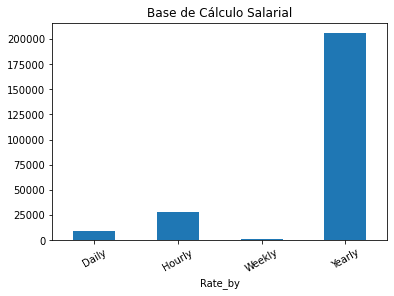

In [25]:
df_tmp.groupby('Rate_by').SalaryRaw.count().plot(kind='bar')
plt.title('Base de Cálculo Salarial')
plt.xticks(rotation=30)
plt.show()

### Criação de intervalos salariais/categorias

In [26]:
intervalosSalariais = [0,25000,50000,70000,90000,120000,300000]

In [27]:
# Alocando na coluna SalaryBin os intervalos de salários
df_tmp['SalaryBin'] = pd.cut(x=df_tmp.SalaryNormalized, bins=intervalosSalariais, labels=False)

### Plotando gráfico com as faixas salariais.

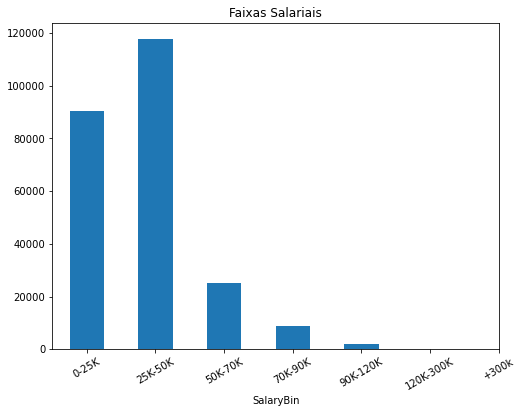

In [28]:
plt.figure(figsize=(8,6))
df_tmp.groupby('SalaryBin')['LocationNormalized'].count().plot.bar()
plt.title("Faixas Salariais")
plt.xticks([0,1,2,3,4,5,6],['0-25K','25K-50K','50K-70K','70K-90K','90K-120K','120K-300K','+300k'], rotation=30)
plt.show()

### Usando Vetorização de palavras para verificar a coluna Title - Cargo

* Criando um vetorizador de palavras e aplicando na coluna Title.

In [29]:
# Importando as bibliotecas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Criando o vetorizador com n-gram de 1 a 3
cv = CountVectorizer(stop_words='english', ngram_range=(1,3),min_df=0.03)

cv.fit(df_tmp.Title)

CountVectorizer(min_df=0.03, ngram_range=(1, 3), stop_words='english')

* Criando um DataFrame com os dados para melhor visualização da ocorrência de palavras.

In [30]:
cargos = pd.DataFrame(cv.transform(df_tmp.Title).todense(), columns=cv.get_feature_names())
cargos

,analyst,assistant,business,consultant,developer,engineer,executive,london,manager,sales,senior,support
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244763,0,0,0,0,0,0,0,0,0,0,0,0
244764,0,0,1,0,0,0,0,0,0,0,0,0
244765,0,0,0,0,0,0,0,0,0,0,0,0
244766,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Criando um novo dataframe com a adição da coluna Faixa Salarial
obs_palavras = pd.concat([cargos, df_tmp.SalaryBin], axis=1)
# Visualizando o DataFrame
obs_palavras.head()

,analyst,assistant,business,consultant,developer,engineer,executive,london,manager,sales,senior,support,SalaryBin
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Criando um contador de palavras para verificar quais mais aparecem olhando por faixa salarial
for i in range(0,6) : 
    contadorPalavras = obs_palavras[obs_palavras['SalaryBin']==i].sum(axis=0)
    print(f'Faixa Salarial de {intervalosSalariais[i]}K até {intervalosSalariais[i+1]}K anual, ocorrências de palavras: ')
    palavrasComuns = contadorPalavras.sort_values(ascending=False)
    print(palavrasComuns)

Faixa Salarial de 0K até 25000K anual, ocorrências de palavras: 
assistant     10158
sales          9615
manager        9226
executive      5482
support        5160
consultant     3665
engineer       3438
business       1969
senior         1885
analyst        1671
london         1610
developer      1449
SalaryBin         0
dtype: int64
Faixa Salarial de 25000K até 50000K anual, ocorrências de palavras: 
SalaryBin     117918
manager        30429
engineer       17307
senior          9893
developer       9206
sales           8367
analyst         5569
london          5429
business        5378
executive       4498
consultant      3840
support         2865
assistant       1878
dtype: int64
Faixa Salarial de 50000K até 70000K anual, ocorrências de palavras: 
SalaryBin     50558
manager        8176
senior         3841
engineer       2442
developer      2115
business       1805
london         1696
consultant     1435
analyst        1371
sales          1313
executive       496
support         34

### Processamento do texto 

* Primeiramente importaremos as bibliotecas usadas

In [33]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nophaie.morais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Criando função para a limpeza do texto

In [34]:
# criando a função para tokenizar texto
def tokenizaTexto(x) :
  # Criando uma lista para receber a saida com o texto já 'tokenizado'
  saida = []
  # Gerando um padrão para a expressão regular ser aplicada
  padrao = "([a-zA-Z]+(?:'[a-z]+)?)"
  # Criando uma lista com as Stop Words, números e pontos
  listaStopWords = stopwords.words('english')
  listaStopWords += list(string.punctuation)
  listaStopWords += ['0','1','2','3','4','5','6','8','9']

  # Percorrendo o texto passado.
  for txt in x:
    # Alocando o texto com a primeira filtragem.
    txt_tokens_raw = nltk.regexp_tokenize(txt, padrao)
    # Padronizando o texto
    txt_tokens_min =[palavra.lower() for palavra in txt_tokens_raw]
    # Retirando simbolos e números.
    txt_words_stopped = [palavra for palavra in txt_tokens_min if palavra not in listaStopWords]
    saida.append(txt_words_stopped)
  # Gerando a saída com o texto tokenizado
  return pd.Series(saida)

### Tokenizando o texto as colunas Title e FullDescription

In [35]:
cargo_tokens = tokenizaTexto(df_tmp['Title'])

In [36]:
desc_tokens = tokenizaTexto(df_tmp['FullDescription'])

In [37]:
cargo_tokens

0                           [engineering, systems, analyst]
1                               [stress, engineer, glasgow]
2                          [modelling, simulation, analyst]
3         [engineering, systems, analyst, mathematical, ...
4           [pioneer, miser, engineering, systems, analyst]
                                ...                        
244763                                   [teacher, science]
244764                    [teacher, business, studies, ict]
244765                                   [english, teacher]
244766                                   [supply, teachers]
244767                                         [accountant]
Length: 244768, dtype: object

* Colocando os tokens em uma lista para verificar a frequência de cada um.

In [38]:
cargo_tokens = [palavra for trabalho in cargo_tokens for palavra in trabalho]

In [39]:
desc_tokens = [palavra for descricao in desc_tokens for palavra in descricao]

* Verificando as frequências de cada palavra na coluna Title e FullDescription

In [40]:
cargo_tokens_freq = FreqDist(cargo_tokens)
cargo_tokens_freq.most_common(100)

[('manager', 50162),
 ('engineer', 24190),
 ('sales', 19769),
 ('senior', 16976),
 ('developer', 13896),
 ('assistant', 12179),
 ('k', 11060),
 ('executive', 10629),
 ('business', 9988),
 ('consultant', 9497),
 ('london', 9488),
 ('analyst', 9316),
 ('support', 8512),
 ('project', 7229),
 ('nurse', 7103),
 ('development', 6874),
 ('account', 6519),
 ('administrator', 6374),
 ('service', 6296),
 ('c', 6054),
 ('software', 5505),
 ('teacher', 5489),
 ('marketing', 5002),
 ('chef', 5000),
 ('care', 4917),
 ('design', 4791),
 ('recruitment', 4568),
 ('advisor', 4465),
 ('technical', 4246),
 ('worker', 3984),
 ('customer', 3885),
 ('head', 3765),
 ('graduate', 3754),
 ('accountant', 3744),
 ('team', 3704),
 ('officer', 3680),
 ('home', 3595),
 ('technician', 3580),
 ('finance', 3459),
 ('mechanical', 3360),
 ('services', 3320),
 ('web', 3278),
 ('financial', 3251),
 ('rgn', 3169),
 ('systems', 3117),
 ('management', 3106),
 ('coordinator', 3076),
 ('lead', 3056),
 ('commercial', 2952),
 ('h

In [41]:
desc_tokens_freq = FreqDist(desc_tokens)
desc_tokens_freq.most_common(100)

[('experience', 428066),
 ('role', 292086),
 ('work', 279820),
 ('team', 267792),
 ('business', 265851),
 ('skills', 235951),
 ('working', 222673),
 ('job', 220377),
 ('within', 217339),
 ('sales', 209320),
 ('client', 193591),
 ('management', 187235),
 ('manager', 184774),
 ('company', 172578),
 ('please', 171876),
 ('development', 162067),
 ('uk', 156638),
 ('looking', 155625),
 ('support', 153141),
 ('excellent', 144519),
 ('service', 139144),
 ('required', 135916),
 ('opportunity', 130941),
 ('new', 127934),
 ('must', 125053),
 ('recruitment', 118692),
 ('successful', 116629),
 ('knowledge', 113386),
 ('apply', 113001),
 ('customer', 110370),
 ('based', 107684),
 ('services', 105075),
 ('ability', 103776),
 ('strong', 100521),
 ('ensure', 97374),
 ('candidate', 96079),
 ('project', 95673),
 ('high', 94305),
 ('join', 93975),
 ('salary', 93254),
 ('environment', 92447),
 ('training', 91363),
 ('design', 91297),
 ('good', 90528),
 ('including', 90156),
 ('leading', 89706),
 ('care', 

* Quantidade total de palavras em todos os anúncios

In [42]:
len(cargo_tokens_freq), len(desc_tokens_freq)

(18150, 192142)

### **Normalização da Frequência de palavras** 


* Criando Função para a normalização das 50 palavras com maior ocorrência

In [43]:
# Criando a função
def normalizeFreqWords(x) :
  # Alocando o número total de palavras
  totalPalavras = sum(x.values())
  # Alocando as 100 com maior ocorrência
  top50Palavras = x.most_common(50)
  # Printando o cabeçalho
  print (f'Palavra                Frequencia Normalizada\n')
  # Percorrendo a lista com as 50 com maior ocorrência
  for palavra in top50Palavras :
    # Efetuando a normalização, onde divide-se a frequência de cada palavra pelo número total de palavras. 
    normalizedFreq = palavra[1]/totalPalavras
    # Efetuando a saída
    print(f'{palavra[0]}    ----------    {normalizedFreq:.4}')

In [44]:
normalizeFreqWords(cargo_tokens_freq)

Palavra                Frequencia Normalizada

manager    ----------    0.05213
engineer    ----------    0.02514
sales    ----------    0.02055
senior    ----------    0.01764
developer    ----------    0.01444
assistant    ----------    0.01266
k    ----------    0.01149
executive    ----------    0.01105
business    ----------    0.01038
consultant    ----------    0.00987
london    ----------    0.009861
analyst    ----------    0.009682
support    ----------    0.008847
project    ----------    0.007513
nurse    ----------    0.007382
development    ----------    0.007144
account    ----------    0.006775
administrator    ----------    0.006625
service    ----------    0.006544
c    ----------    0.006292
software    ----------    0.005721
teacher    ----------    0.005705
marketing    ----------    0.005199
chef    ----------    0.005197
care    ----------    0.00511
design    ----------    0.004979
recruitment    ----------    0.004748
advisor    ----------    0.004641
technical

In [45]:
normalizeFreqWords(desc_tokens_freq)

Palavra                Frequencia Normalizada

experience    ----------    0.01145
role    ----------    0.007812
work    ----------    0.007484
team    ----------    0.007163
business    ----------    0.007111
skills    ----------    0.006311
working    ----------    0.005956
job    ----------    0.005894
within    ----------    0.005813
sales    ----------    0.005599
client    ----------    0.005178
management    ----------    0.005008
manager    ----------    0.004942
company    ----------    0.004616
please    ----------    0.004597
development    ----------    0.004335
uk    ----------    0.00419
looking    ----------    0.004163
support    ----------    0.004096
excellent    ----------    0.003865
service    ----------    0.003722
required    ----------    0.003635
opportunity    ----------    0.003502
new    ----------    0.003422
must    ----------    0.003345
recruitment    ----------    0.003175
successful    ----------    0.003119
knowledge    ----------    0.003033
apply  

### Criando Tri-gramas para validação no texto da coluna Title

* Importando bibliotecas necessárias

In [46]:
from nltk.collocations import *
from nltk import ngrams

In [47]:
trigram_ = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(cargo_tokens)
score = finder.score_ngrams(trigram_.raw_freq)

In [48]:
score[0:20]

[(('business', 'development', 'manager'), 0.0025400995877015112),
 (('chef', 'de', 'partie'), 0.001673306193207624),
 (('mechanical', 'design', 'engineer'), 0.0010289274107301539),
 (('motor', 'trade', 'job'), 0.0010091803190090702),
 (('qualified', 'social', 'worker'), 0.0006183957670549915),
 (('business', 'development', 'executive'), 0.000608002560886),
 (('graduate', 'sales', 'executive'), 0.0005643510949762359),
 (('field', 'service', 'engineer'), 0.0005435646826382531),
 (('trainee', 'recruitment', 'consultant'), 0.0005404467207875556),
 (('field', 'sales', 'executive'), 0.0005342107970861608),
 (('manager', 'business', 'development'), 0.0005248569115340684),
 (('area', 'sales', 'manager'), 0.0004967952548777915),
 (('staff', 'nurse', 'rgn'), 0.0004947166136439932),
 (('customer', 'service', 'advisor'), 0.0004697729188384137),
 (('registered', 'general', 'nurse'), 0.0004583403920525231),
 (('manager', 'sales', 'executive'), 0.0004406719415652376),
 (('senior', 'quantity', 'survey

### Criando uma núvem de palavras com os Cargos

* Importando as bibliotecas necessárias.
* A biblioteca WordCloud, tem dependência da numpy e da pillow, caso elas não estejam instaladas serão necessárias. Também há a necessidade de instalação do Microsoft Visual C++ 2014 ou mais atual. O link de instalação do Microsoft Visual C++ é esse : https://docs.microsoft.com/pt-br/cpp/windows/latest-supported-vc-redist?view=msvc-170


* A lib Wordcloud, talvez precise de instalação para instalá-la basta entrar no console e utilizar o pip, digitando : 

**pip install wordcloud.**

* Caso ainda não consiga e esteja usando o Anaconda, abra o console e digite : 

**conda install -c conda-forge wordcloud**

In [50]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

* Criando uma núvem de palavras para a melhor visualização de quais cargos mais ocorrem

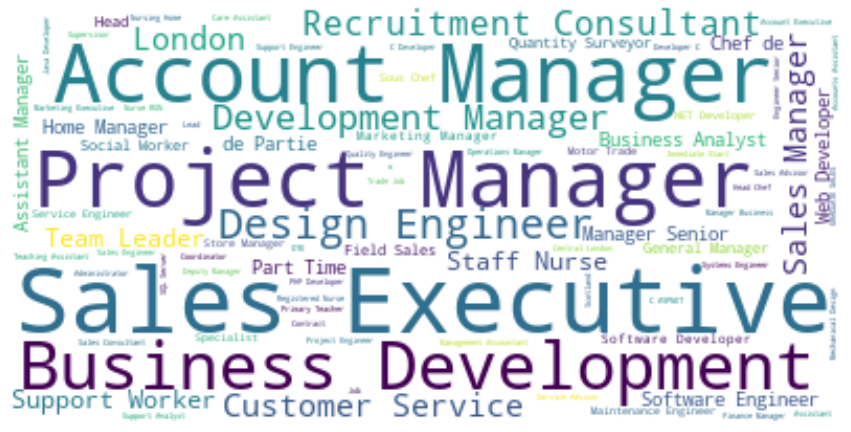

In [51]:
#Alocando o texto da coluna Title em uma variável
text = " ".join(descricao for descricao in df_tmp['Title'])

#Criando uma lista de stopwords.
stopwords = set(STOPWORDS)

# Criando a núvem de palavras
wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Exportação do dataset, para posterior uso.**

In [53]:
df_tmp.to_csv('Train_rev2.csv')